# MODELS STATISTICS NOTEBOOK

Generates statistics and compares different models

# 1/Imports

In [1]:
# Imports
%matplotlib inline
import json
import os
import matplotlib.pyplot as plt
from AxonDeepSeg.testing.segmentation_scoring import *
import pickle
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.2)

from time import time
#from ipywidgets.widgets import *
from scipy.misc import imread, imsave

# 2/Choose models to compare

In [2]:
L_models_to_compare=['atrous_config_tests/model_1_1','atrous_config_tests/model_1_10','atrous_config_tests/model_1_11']

# 3/ Computation of statistics

First, we compare the pixel-wise statistics of the different models: accuracy, pw-dice, mAP (per class, total)

In [3]:
img_name='SEM_data14'

In [4]:
pr_data={}
for model_name in L_models_to_compare:
    pr_data[model_name] = pickle.load( open( os.path.join('../models/',model_name,img_name+'_pixel_wise_statistics.pkl'), "rb" ) )

Affichage du tableau comparatif

In [5]:
pw_stats=pd.DataFrame()
for model_name in L_models_to_compare:
    # Accuracy
    pw_stats.loc['Acc',str(model_name)]=pr_data[model_name]['total_acc']
    
    # Dice
    pw_stats.loc['mDice',str(model_name)]=pr_data[model_name]["dice"]['micro']
    pw_stats.loc['Dice_BG',str(model_name)]=pr_data[model_name]["dice"]['bg']
    pw_stats.loc['Dice_MY',str(model_name)]=pr_data[model_name]["dice"]['myelin']
    pw_stats.loc['Dice_AX',str(model_name)]=pr_data[model_name]["dice"]['axon']
    
    # AP-related metrics
    pw_stats.loc['mAP',str(model_name)]=pr_data[model_name]["mAP"]["micro"]
    pw_stats.loc['AP_BG',str(model_name)]=pr_data[model_name]["mAP"][0]
    pw_stats.loc['AP_MY',str(model_name)]=pr_data[model_name]["mAP"][1]
    pw_stats.loc['AP_AX',str(model_name)]=pr_data[model_name]["mAP"][2]
    

In [6]:
pw_stats

,atrous_config_tests/model_1_1,atrous_config_tests/model_1_10,atrous_config_tests/model_1_11
Acc,0.834485,0.824783,0.824543
mDice,0.834704,0.825306,0.825122
Dice_BG,0.867953,0.855112,0.858587
Dice_MY,0.776727,0.776375,0.769947
Dice_AX,0.850936,0.836366,0.837809
mAP,0.927985,0.911010,0.914049
AP_BG,0.940020,0.922612,0.923499
AP_MY,0.891924,0.880714,0.880644
AP_AX,0.947196,0.931877,0.936189


Affichage des courbes d'AP

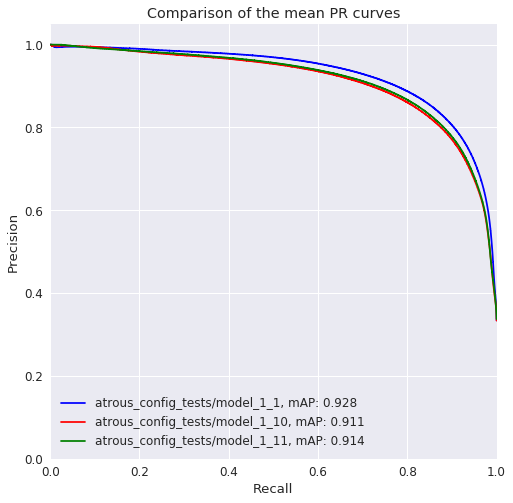

In [7]:
# Display the plots
plt.figure(figsize=(8,8))
L_colors=['b','r','g','k','gold','plum','darked']
for i, model_name in enumerate(L_models_to_compare):
    pr_data_model=pr_data[model_name]
    plt.step(pr_data_model['recall']['micro'], pr_data_model['precision']['micro'], color=L_colors[i], alpha=1.0,
         where='post',label=str(model_name)+', mAP: '+str(np.round(pr_data_model['mAP']['micro'],decimals=3)))
    
plt.legend(loc=0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparison of the mean PR curves')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

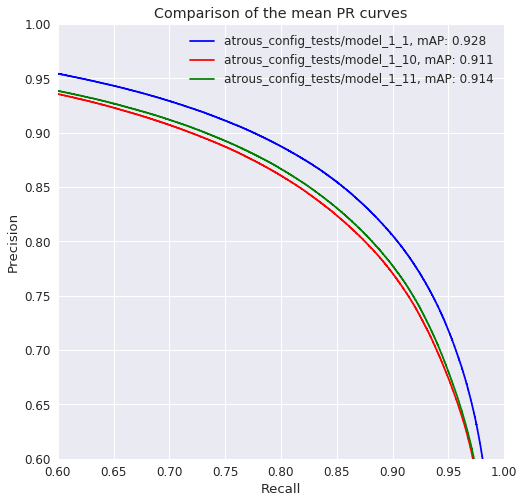

In [8]:
# Display the plots
plt.figure(figsize=(8,8))
L_colors=['b','r','g','k','gold','plum','darked']
for i, model_name in enumerate(L_models_to_compare):
    pr_data_model=pr_data[model_name]
    plt.step(pr_data_model['recall']['micro'], pr_data_model['precision']['micro'], color=L_colors[i], alpha=1,
         where='post',label=str(model_name)+', mAP: '+str(np.round(pr_data_model['mAP']['micro'],decimals=3)))
    
plt.legend(loc=0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparison of the mean PR curves')
plt.ylim([0.6, 1.0])
plt.xlim([0.6, 1.0])
plt.show()